## Bibliotecas

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import *

## Limites

Ao longo de uma função, podemos querer saber qual é o valor de y = f(x) quando x tende a algum determinado valor. Por exemplo, quando x tende a 2 qual é o valor da função abaixo? 

$$y = f(x) = x^2$$

In [12]:
# Definindo a função
def funcao(x):
    return x**2

In [68]:
# Definindo valores de x
x = np.linspace(-10,10,101)
x_inf = np.linspace(1,1.999999,1001) # x_inferior
x_sup = np.linspace(3,1.999999,1001) # x_superior

In [69]:
df = pd.DataFrame()

# inferior
df['x_inf'] = x_inf
df['f(x_inf)'] = funcao(x_inf)
# superior
df['x_sup'] = x_sup
df['f(x_sup)'] = funcao(x_sup)

df

,x_inf,f(x_inf),x_sup,f(x_sup)
0,1.000000,1.000000,3.000000,9.000000
1,1.001000,1.002001,2.999000,8.994001
2,1.002000,1.004004,2.998000,8.988004
3,1.003000,1.006009,2.997000,8.982009
4,1.004000,1.008016,2.996000,8.976016
...,...,...,...,...
996,1.995999,3.984012,2.003999,4.016012
997,1.996999,3.988005,2.002999,4.012005
998,1.997999,3.992000,2.001999,4.008000
999,1.998999,3.995997,2.000999,4.003997


Abaixo podemos vizualizar que na medida em que x se aproxima de 2, lê-se, $x \to 2$, o valor de $y \to 4$.Podemos reescrever da seguinte forma:

$$\lim_{x \to 2} \ (x^2) = 4$$

### Inclinação

Podemos querer encontrar a reta que tangencia a função neste ponto, esse dado é importante pois com ela conseguimos encontrar a "taxa de variação" da função neste determinado ponto. Sabendo o valor da função no ponto x e da variação $\Delta$x conseguimos calcular a inclinação (*m*) da seguinte forma: 

$$
m = \frac {\Delta y}{\Delta x}
\quad \rightarrow \quad
m = \frac {y_2 - y_1}{x_2 - x_1}
$$

Que pode ser reescrito como sendo igual a:

$$
m = \frac {f(x+\Delta x) - f(x)}{(x+\Delta x) - x}
\quad \rightarrow \quad
m = \frac {f(x+\Delta x) - f(x)}{\Delta x}
$$

In [35]:
m = (df['f(x_inf)'][1000] - df['f(x_inf)'][999])/(df['x_inf'][1000]-df['x_inf'][999])
m

3.998998001000094

### Reta Tangente

Visto que conseguimos já calcular a inclinação "*m*", podemos calcular a reta tangente segundo a seguinte fórmula:

$$t = m . x + b$$

In [36]:
def reta_tangente(x):
    return m * x - 4

reta_tangente(x_inf)

array([-1.00199900e-03,  2.99699500e-03,  6.99598900e-03, ...,
        3.98999401e+00,  3.99399301e+00,  3.99799200e+00])

Abaixo podemos vizualizar a reta que tangencia a função no ponto f(2), essa informação também nos diz que a função nesta ponto está variando 4 para uma dada mudança marginal de x. 

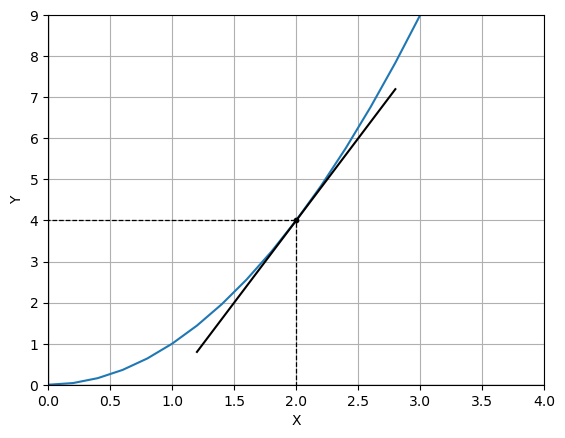

In [104]:
plt.plot(x, funcao(x))
plt.plot(x[56:65], reta_tangente(x[56:65]), c='black')
plt.scatter(2,4, s=10, c='black', zorder = 3)

plt.axhline(0, linestyle='-', linewidth=0.9, c='black')
plt.axvline(0, linestyle='-', linewidth=0.9, c='black')

plt.plot([-4,2], [4,4], linestyle='--', linewidth = 0.9, color='black')
plt.plot([2,2], [-1,4], linestyle='--', linewidth = 0.9, color='black')

x_max = 4
y_max = 9
x_min = 0
y_min = 0

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')

plt.grid()

## Derivadas

O conceito de derivadas está ligada ao conceito de limites, por meio do cálculo do limites podemos calcular como a função f(x) varia em um determinado ponto x. Uma primeira forma de representação a derivada enquanto uma função remete ao cálculo de limites:

$$
f'(x) = \lim_{h \to 0} \ \frac {f(x+h) - f(x)}{h}
$$

Ou seja, para qualquer valor de x, a derivada enquanto uma função é encontrada quando h tende a zero. Utilizando como exemplo a função $f(x) = x^2$:

$$
f'(x) = \lim_{h \to 0} \ \frac {(x+h)^2 - x^2}{h} = \frac {x^2 + 2xh + h^2 - x^2}{h} = 2xh + h^2 = 2x
$$

Uma forma mais conveniente para representar derivadas é pela notação de Leibniz, grande matemático do século 17. A símbolo $D = \frac {d}{dx}$ são chamados operadores de diferenciação e são equivalente a f'(x):

$$
\frac {d}{dx} f(x) = 2 . x
$$

Existem regras para derivar funções que não será abordada nestas notas visto serem mais apropriadas para calculo "a mão", porém o Python oferece bibliotecas para a realizar deste tipo de cálculo. 

In [66]:
x = symbols('x')
f = x**2

# Função para derivação
dx_f = diff(f)
dx_f

2*x

In [65]:
# Outra exemplo
f_2 = x**3 + 2 * x ** 2 + 2

diff(f_2)

3*x**2 + 4*x

### Funções não diferenciáveis

Nem toda a função é diferenciável, há três casos possíveis segundo Stewart:

1. Presenção de "quina" ou "dobra", ao tentar diferenciar perceberemos que os limites à esquerda e à direita são diferentes;
2. Descontinuidade;
3. Tangente vertical, pois perceberemos que ela tenderá ao infinito.

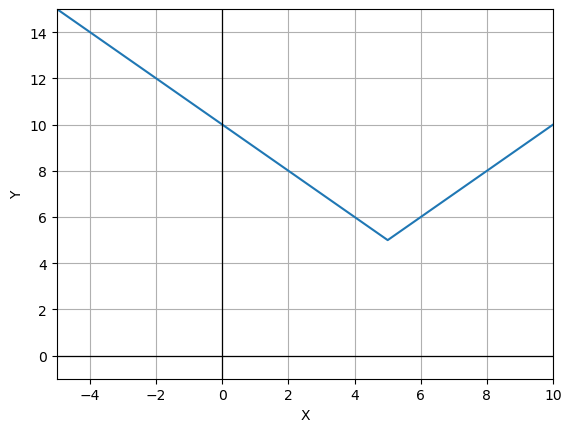

In [113]:
# Quina
def f_quina(x):
    return np.abs(x-5)+5
    
plt.plot(x, f_quina(x))

plt.axhline(0, linestyle='-', linewidth=0.9, c='black')
plt.axvline(0, linestyle='-', linewidth=0.9, c='black')

x_max = 10
y_max = 15
x_min = -5
y_min = -1

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')

plt.grid()    

### Derivadas de outras ordens

A princípio calculamos a derivada de primeira ordem f'(x) entretanto podemos calcular derivadas de ordens mais elevadas como f''(x) que é basicamente a derivada da derivada. Enquanto a primeira derivada pode ser interpretada com um exemplo como a velocidade de um veículo, a segunda derivada pode ser interpretada como a aceleração. Podemos representar um derivada de n-ésima ordem como: 

$$
y^n = f^n = \frac {d^n y}{dx^n}
$$

## Referência

Cálculo, ed. 6, J. Stewart